# Handwritten recognition: US postal zipcode dataset
taken from *Vincent Loibl* labwork


(257, 256)
(257,)
(255, 256)


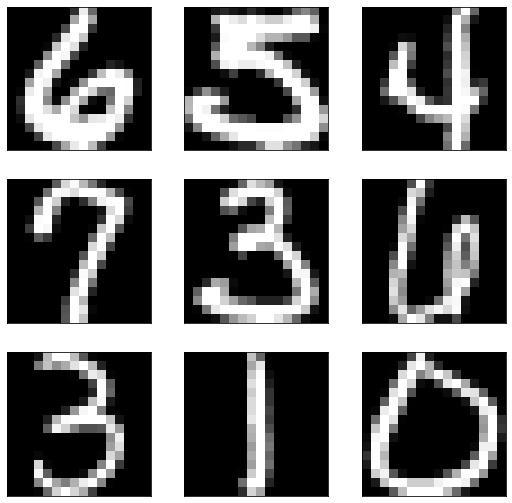

In [1]:
# Import modules
%matplotlib inline
import matplotlib
import scipy as sp
import scipy.io as spio
import matplotlib.pyplot as plt

# Warning: put the data files in the notebook directory
data = spio.loadmat("zip_train.mat")
Xtrain = data["Xtrain"]
Ytrain = data["Ytrain"]
Xshape = Xtrain.shape
Ytrain = sp.reshape(Ytrain,(Xshape[0],))
Yshape = Ytrain.shape
print(Xshape)
print(Yshape)

data2 = spio.loadmat("zip_test.mat")
Xtest = data2["Xtest"]
Xtestshape = Xtest.shape
Ytest = data2["Ytest"]
Ytest = sp.reshape(Ytest,(Xtestshape[0],))
Ytestshape = Ytest.shape
print(Xtestshape)

fig=plt.figure(figsize=(9,9)) #to specify the size of the images
for i in range(9):
    fig.add_subplot(3,3,i+1)
    mplot=plt.imshow(sp.reshape(Xtrain[i],(16,16)),cmap="gray")
    mplot.axes.get_xaxis().set_visible(False)
    mplot.axes.get_yaxis().set_visible(False)

0.8638132295719845


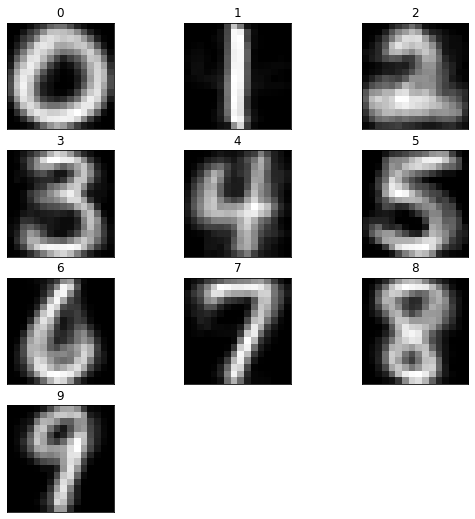

Now with corresponding noise to each pixel


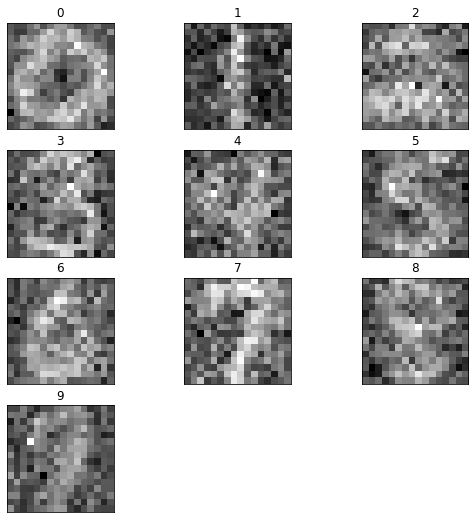

In [2]:
#lets use scikit LDA for training
# remove sklearn warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as OA

model = LDA(solver = 'lsqr',shrinkage = 1)
model.fit(Xtrain,Ytrain)

y_pred = model.predict(Xtrain)
oa = OA(Ytrain, y_pred)
print(oa)

#heavy load here


# this prints all the images classified in classes by the LDA

#for k in range(1,10):
#    print(k)
#    j=1
#    fig=plt.figure(figsize=(10,10)) #to specify the size of the images
#    for i in Xtrain[(y_pred==k)]:
#        fig.add_subplot(10,5,j)
#        plt.imshow(sp.reshape(Xtrain[j],(16,16)),cmap="gray")
#        j = j+1
#    plt.show()


#this show the mean vector of the LDA classes

fig=plt.figure(figsize=(9,9)) #to specify the size of the images
for k in range(0,10):
    fig.add_subplot(4,3,k+1)
    Xmeank = sp.mean(Xtrain[(y_pred==k)],axis=0)
    mplot = plt.imshow(sp.reshape(Xmeank,(16,16)),cmap="gray")
    plt.title(k)
    #hide the axis
    mplot.axes.get_xaxis().set_visible(False)
    mplot.axes.get_yaxis().set_visible(False)
plt.show()

print("Now with corresponding noise to each pixel")
fig=plt.figure(figsize=(9,9)) #to specify the size of the images
for k in range(0,10):
    fig.add_subplot(4,3,k+1)
     #add a noize
    Xmeank = sp.mean(Xtrain[(y_pred==k)],axis=0) + sp.random.randn(1,256)*sp.sqrt(sp.diagonal(model.covariance_))
    mplot = plt.imshow(sp.reshape(Xmeank,(16,16)),cmap="gray")
    plt.title(k)
    #hide the axis
    mplot.axes.get_xaxis().set_visible(False)
    mplot.axes.get_yaxis().set_visible(False)


In [3]:
#misclassification rate on test set
y_pred_test = model.predict(Xtest)
succesTest = OA(Ytest, y_pred_test )
print("test mcr={}".format(1.-succesTest) )

test mcr=0.2588235294117647


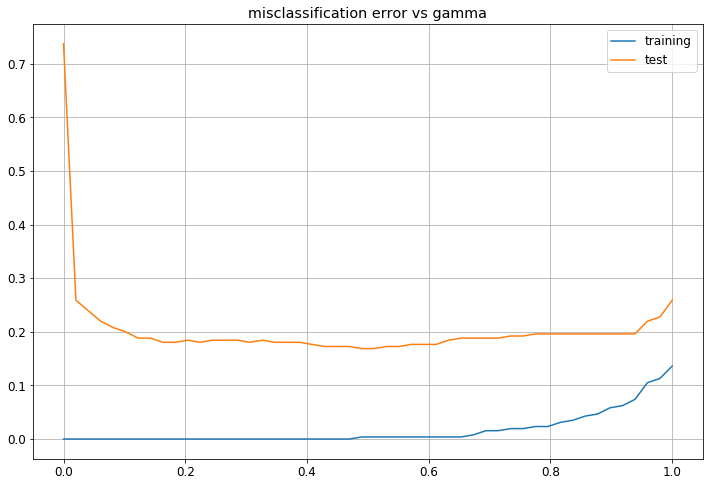

In [33]:
#plot of the misclassification rate on test function to gamma the regularized discriminant
#in python it is done thanks to the shrikange param in [0;1]
res = 50 #you can crank up the resolution but it will not change a lot
gamma = sp.linspace(1e-6,1,res)
mcr_test = sp.zeros(res)
mcr_train = sp.zeros(res)

for i in range(res):
    model2 = LDA(solver = 'lsqr',shrinkage = gamma[i])
    model2.fit(Xtrain,Ytrain)
    
    yhat_train = model2.predict(Xtrain)
    acc_train = OA(Ytrain, yhat_train )
    mcr_train[i] = 1.-acc_train
    
    y_pred_test2 = model2.predict(Xtest)
    succesTest2 = OA(Ytest, y_pred_test2 )
    mcr_test[i] = 1-succesTest2

plt.figure(figsize=(12,8))
plt.rc('font', size=12)
plt.plot(gamma,mcr_train,label="training")
plt.plot(gamma,mcr_test,label="test")
plt.legend()
plt.title("misclassification error vs gamma")
plt.grid()
plt.show()

In [34]:
# Tune hyperparameter gamma
ihat = sp.argmin(mcr_test)
gamhat = gamma[ihat]
mcr_opt = mcr_test[ihat]
print('(estimated) optimal value for gamma: {}'.format(gamhat))
print('misclassification rate for best gamma parameter: {}'.format(mcr_opt))


(estimated) optimal value for gamma: 0.4897964285714285
misclassification rate for best gamma parameter: 0.1686274509803921
